# Mounting Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Importing Modules


In [2]:
import pandas as pd
import os
import numpy
from numpy import asarray
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import  RandomOverSampler
import tensorflow as tf
from keras import applications
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten
from keras import Model
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input
from tensorflow import keras
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot as plt

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


# Uploading the dataset and concatinating all files into a single dataframe
*Change **Log** if want to run on different software module*
*Change **Log** to **PROMISE_dataset** if want to run on whole combined dataset*

In [3]:
path = '/content/gdrive/My Drive/Semester Long Assignment/Log/'
filenames = os.listdir(path)
files = [pd.read_csv(os.path.join(path, filename)) for filename in filenames]
PROMISE_dataset = pd.concat(files)

# Converting to float data type

In [4]:
X = PROMISE_dataset.iloc[:, 0:20]
X = X.to_numpy().astype('float32')
Y = PROMISE_dataset.iloc[:,20:21]
Y = Y.to_numpy().astype('float32')

In [5]:
print(Y.shape)

(449, 1)


# Applying Z score Scaling ( Normalising the Data )

In [6]:
scaler = StandardScaler()
X_scl = scaler.fit_transform(X)
print(X.shape)

(449, 20)


# Applying Random Over Sampling on the dataset | 
# Sampling Strategy Set to 'not majority'

In [7]:
X_scl,Y = RandomOverSampler(sampling_strategy='not majority').fit_sample(X_scl,Y)
print(X_scl.shape)
print(Y.shape)

(2079, 20)
(2079,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


# Fixing Dimesions



In [8]:
Y.shape = (Y.shape[0],1)

# Spliting DataSet in Ratio 70:30 


In [9]:
x_train, x_test, Y_train, Y_test = train_test_split(X_scl, Y, test_size = 0.3, random_state = 0)
print(Y_train.shape)
print(x_train.shape)

(1455, 1)
(1455, 20)


In [10]:
#Debug Code
print(Y_train)

[[ 3.]
 [10.]
 [ 8.]
 ...
 [ 3.]
 [ 4.]
 [ 8.]]


In [11]:
#Debug Code
print(Y_train)
for i in range(10):
  print(Y_train[i])

[[ 3.]
 [10.]
 [ 8.]
 ...
 [ 3.]
 [ 4.]
 [ 8.]]
[3.]
[10.]
[8.]
[5.]
[7.]
[10.]
[9.]
[2.]
[10.]
[7.]


# Maximum Number of class

In [12]:
c = 0 
for i in range(Y_train.shape[0]):
  c = max(c ,Y_train[i][0])
c = int(c)
print(c)

10


In [13]:
y_train=to_categorical(Y_train)
y_test=to_categorical(Y_test)

In [14]:
#Debug Code
print(y_test.shape)
print(y_train.shape)
print(x_test.shape)
print(x_train.shape)

(624, 11)
(1455, 11)
(624, 20)
(1455, 20)


# Importing Non Trained ResNet50 layers

In [15]:
base_model = ResNet50(include_top=False,weights=None,input_shape=(64,64,3),classes=y_train.shape[1])

# Model creation using KERAS Sequential API

In [16]:
model_1 = Sequential()
model_1.add(tf.keras.Input(20,))
model_1.add(Dense(12288,))
model_1.add(tf.keras.layers.Reshape((64,64,3),input_shape=(12288,)))
model_1.add(base_model) 
model_1.add(Flatten())
model_1.add(Dense(1024,activation=('relu'),input_dim=2048))
model_1.add(Dense(512,activation=('relu'))) 
model_1.add(Dense(256,activation=('relu'))) 
model_1.add(Dense(128,activation=('relu')))
model_1.add(Dense(64,activation=('relu'))) 
model_1.add(Dense(c+1,activation=('softmax')))
model_1.output_shape

(None, 11)

# Defining Optimizer, Loss Function & Evalution Metrices

In [17]:
model_1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy',"mse","mae"])

# Training the Model
*change Batch Size depending on the dataset used*
*otherwise if dataset is large and batch size is small it will take days to train the model*

In [18]:
history = model_1.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50,batch_size=16)

Epoch 1/50
91/91 [==============================] - 14s 89ms/step - loss: 3.6242 - accuracy: 0.1557 - mse: 0.0914 - mae: 0.1563 - val_loss: 2.4628 - val_accuracy: 0.0801 - val_mse: 0.0834 - val_mae: 0.1653
Epoch 2/50
91/91 [==============================] - 6s 69ms/step - loss: 2.0544 - accuracy: 0.2681 - mse: 0.0731 - mae: 0.1439 - val_loss: 3.1457 - val_accuracy: 0.1122 - val_mse: 0.0890 - val_mae: 0.1652
Epoch 3/50
91/91 [==============================] - 6s 69ms/step - loss: 1.6167 - accuracy: 0.4190 - mse: 0.0612 - mae: 0.1196 - val_loss: 3.0252 - val_accuracy: 0.0849 - val_mse: 0.0873 - val_mae: 0.1657
Epoch 4/50
91/91 [==============================] - 6s 69ms/step - loss: 1.3762 - accuracy: 0.4841 - mse: 0.0540 - mae: 0.1078 - val_loss: 3.4821 - val_accuracy: 0.0785 - val_mse: 0.0903 - val_mae: 0.1646
Epoch 5/50
91/91 [==============================] - 6s 69ms/step - loss: 1.1852 - accuracy: 0.5570 - mse: 0.0478 - mae: 0.0954 - val_loss: 5.6700 - val_accuracy: 0.0913 - val_mse:

# Results:

In [19]:
print("Test Loss , MAE , MSE")
result = model_1.evaluate(x_test,y_test)
dict(zip(model_1.metrics_names, result))

Test Loss , MAE , MSE
20/20 [==============================] - 2s 21ms/step - loss: 0.5154 - accuracy: 0.8077 - mse: 0.0228 - mae: 0.0381


{'accuracy': 0.807692289352417,
 'loss': 0.5153874158859253,
 'mae': 0.03807924687862396,
 'mse': 0.02282467484474182}

# Plotting Graphs :

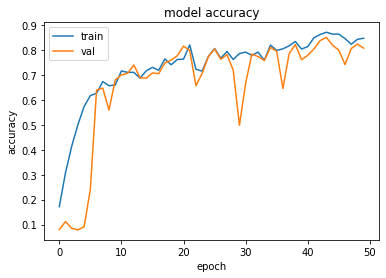

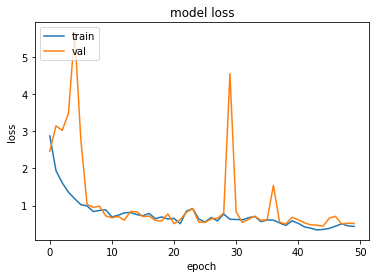

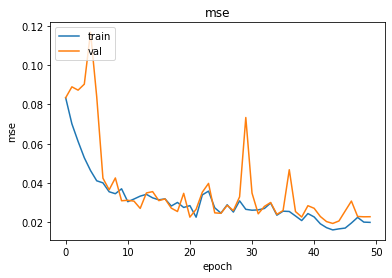

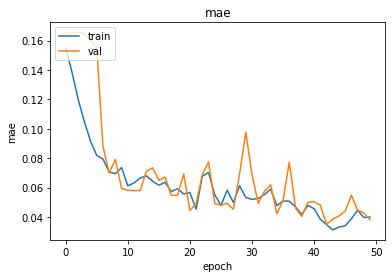

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Manual Checking ( IF Required )  **RUN ONLY WHEN U HAVE TO DEBUG THE CODE**

In [21]:
y_pred = model_1.predict(x_test)
for i in range(y_test.shape[0]):
  if(y_test[i][0]!=1.):
    print(y_pred[i])
    print(y_test[i])
    indexa = 0
    indexb = 0
    ia = 0
    ib = 0
    for j in range(c+1):
      if(y_pred[i][j]>ia):
        ia = y_pred[i][j]
        indexa = j
      if(y_test[i][j]>ib):
        ib = y_test[i][j]
        indexb = j
    print(indexa)
    print(indexb)
    print(" ")

[1.8032019e-03 1.7813960e-04 1.2347463e-03 9.9676573e-01 1.8183968e-05
 1.2388973e-10 1.1878060e-13 1.5037171e-13 2.7325347e-14 7.1336293e-15
 1.8468960e-13]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
3
3
 
[1.5468085e-03 4.0263860e-04 7.4171003e-05 1.1606491e-03 2.0159325e-06
 1.1584219e-05 2.4277827e-07 9.9679404e-01 1.7170783e-10 1.0196053e-06
 6.9623707e-06]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
7
7
 
[1.59937870e-02 1.30306126e-03 7.23314646e-04 5.08893793e-03
 9.69770730e-01 7.10618030e-03 1.42242584e-06 1.07701578e-06
 2.00252066e-06 9.37363438e-06 1.00325316e-07]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
4
1
 
[7.8748883e-09 2.5659719e-09 1.7054623e-06 3.4354962e-03 4.8319867e-05
 6.3973266e-07 1.6026634e-05 8.2245530e-14 9.9645019e-01 3.0534655e-05
 1.7088025e-05]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
8
8
 
[5.5663025e-07 9.5175835e-04 2.6102996e-05 1.4168443e-06 5.6620978e-04
 9.9844557e-01 4.4842969e-09 2.5321240e-08 1.2518353e-10 8.5095089e-06
 6.5258889e-11]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
